# Mouse skin tutorial



In [1]:
from dictys.net import dynamic_network
d0=dynamic_network.from_file('/ocean/projects/cis240075p/asachan/datasets/B_Cell/multiome_1st_donor_UPMC_aggr/tut_files/skin/output/dynamic.h5')

In [2]:
# Removes CPU usage limit by some jupyter versions
import os
os.environ['KMP_AFFINITY'] = ''
# Configure matplotlib to enable large animations
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
import matplotlib.pyplot as plt
# Prepare trajectory files
import pandas as pd

IRS


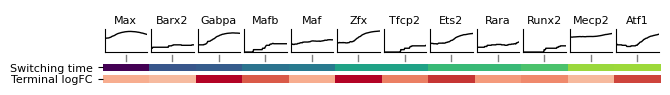

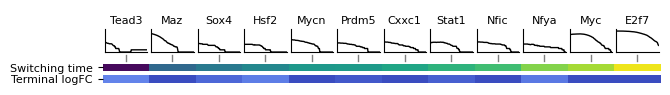

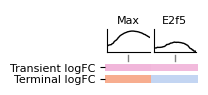

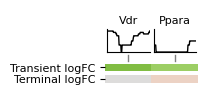

Hair-Shaft-Medulla


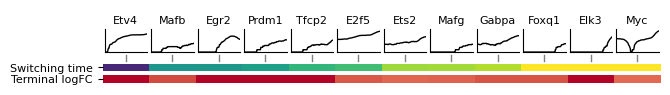

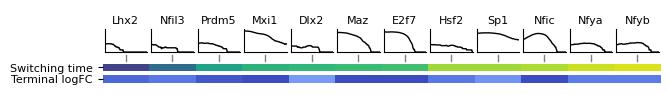

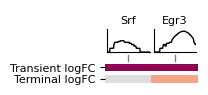

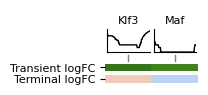

In [3]:
#Trajectory branch defined as (starting node, ending node) from trajectory inference
#See main1.ipynb
branches={
	'IRS':(3,1),
	'Hair-Shaft-Medulla':(3,2)
}
#Value range for coloring
vrange={
	'Terminal logFC':[-4.5,4.5],
	'Transient logFC':[-1.5,1.5],
	'Switching time':[0.2,0.8],
}

for branchname in branches:
	print(branchname)
	figs=d0.draw_discover(*branches[branchname],ntops=(12,12,2,2),vrange=vrange)
	plt.show()

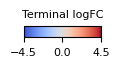

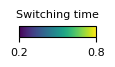

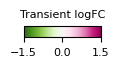

In [4]:
from operator import or_
from functools import reduce
from dictys.plot import colorbar

#Color bar font size
fs=8

colormaps=reduce(or_,[x[2] for x in figs])
for xi0 in range(len(colormaps)):
	xi=list(colormaps)[xi0]
	colormap=colormaps[xi]
	ans2=colorbar(colormap.cmap.name,colormap.norm.vmin,colormap.norm.vmax,orientation='horizontal',figsize=(1,0.15),title=xi,title_fontsize=fs)
	xticks=[colormap.norm.vmin,0,colormap.norm.vmax] if colormap.norm.vmin*colormap.norm.vmax<0 else [colormap.norm.vmin,colormap.norm.vmax]
	ans2[1].set_xticks(xticks)
	ans2[1].tick_params(axis='x',labelsize=fs)

In [5]:
from IPython.display import FileLink
from dictys.plot import layout,panel
# Number of frames (interpolated time points), use 100 or higher for finer resolution
nframe=10
# Animation FPS for saving. Determines speed of play
fps=0.10*nframe
# DPI for animation
dpi=100

In [6]:
branchname='IRS'
# Select TFs for each row's dynamic subnetwork graph
tfs_subnet=[
	['Lhx2'],
	['Stat3'],
]
# Select TFs for each row's other plots
tfs_ann=[
	['Lhx2','Dlx2','Sox4'],
	['Stat3','Klf4', 'Jun', 'Fosb'],
]
# Select genes to annotate as targets in all rows
target_ann=['Krt75','Lgr5','Mgst1','Mki67', 'Scd1']

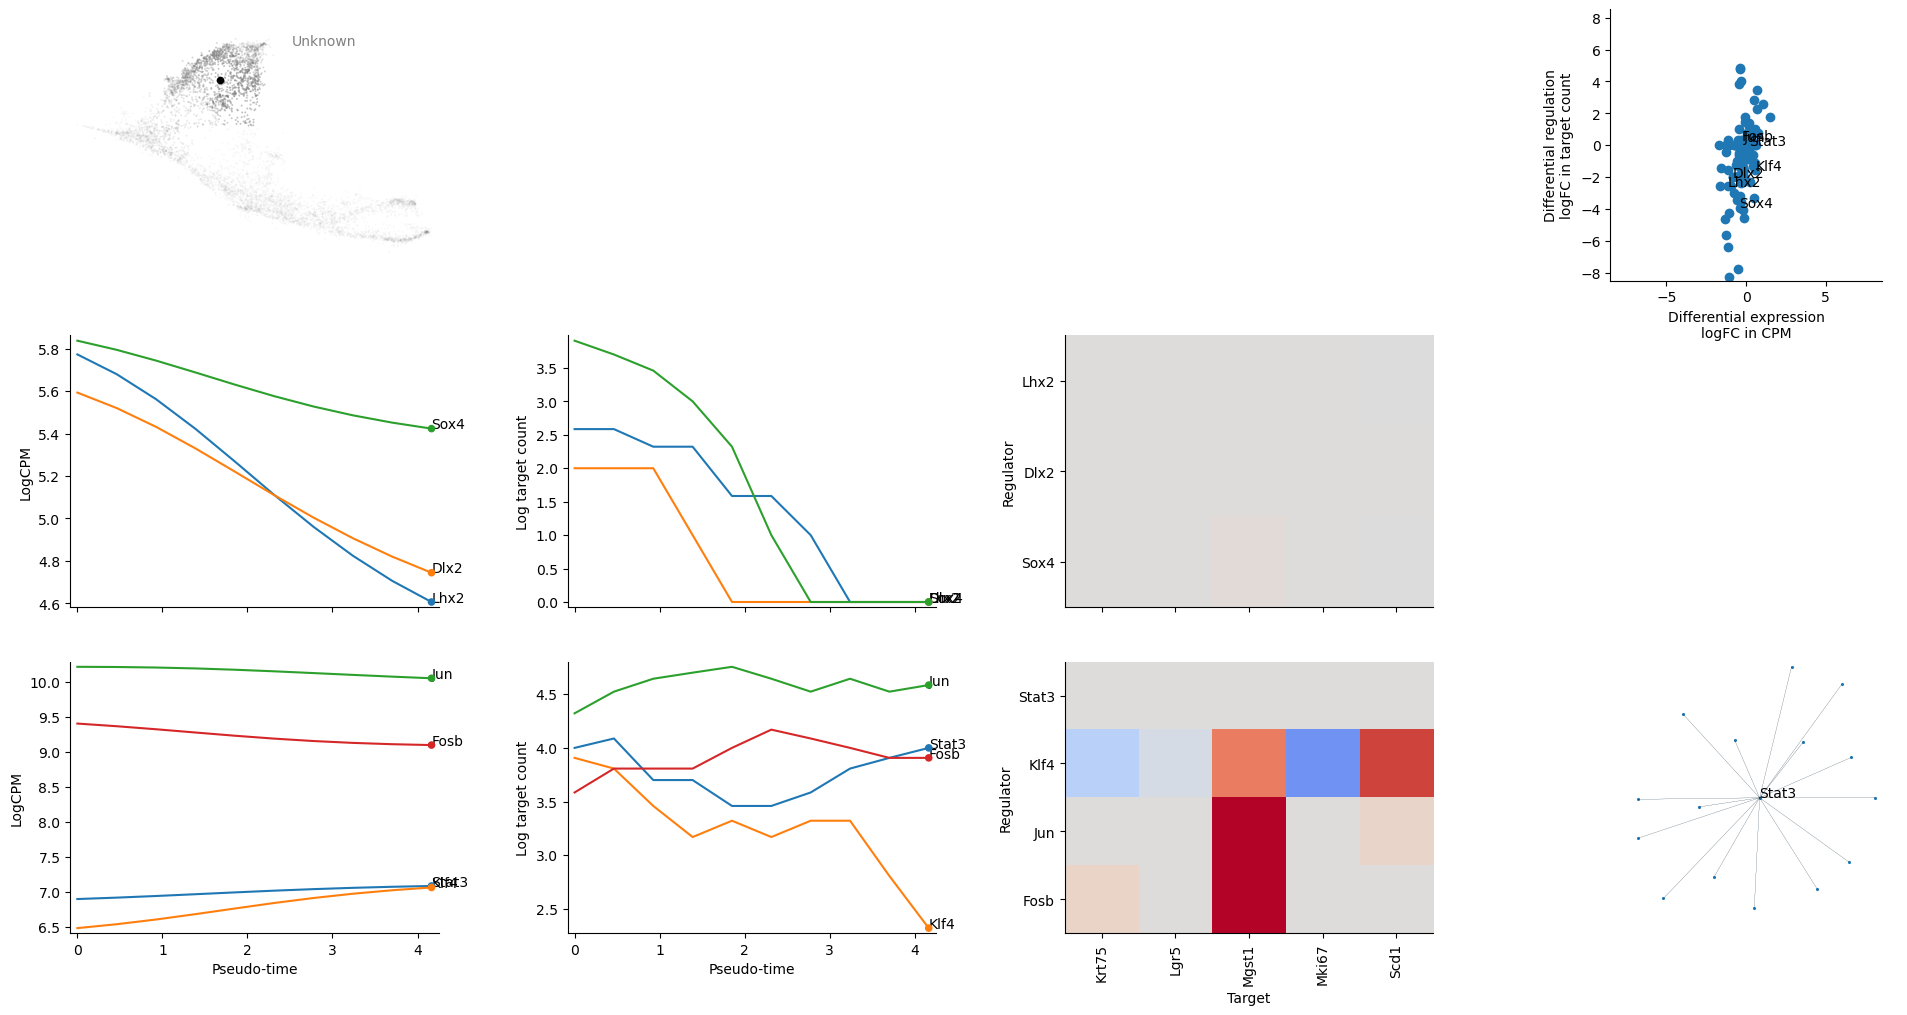

In [7]:
branch=branches[branchname]
# Draw dynamic network with notch layout
layout1=layout.notch(nframe=nframe,dpi=dpi)
pts,fig,panels,animate_ka=layout1.draw(
	d0,branch,
	# Set genes to annotate
	bcde_tfs=tfs_ann,e_targets=target_ann,f_tfs=tfs_subnet,
	# Custom legend location for long cell type name
	a_ka={'scatterka':{'legend_loc':(0.6,1)}},
	# Custom configurations for color range
	e_ka={'lim':[-0.02,0.02]},
)
ca=panel.animate_generic(pts,fig,panels)
anim=ca.animate(**animate_ka)

# Saving animation
# Option 1: Visualize animation within jupyter. This will make the notebook large especially with many frames
from IPython.display import HTML
HTML(anim.to_jshtml())

# # Option 2: Save animation to mp4 file
# # If you receive a codec related error, try a different codec, e.g. with `codec='h264'`. You can list available codecs with `ffmpeg -codecs`.
# w=matplotlib.animation.writers['ffmpeg_file'](fps=fps,codec='mpeg4')
# w.frame_format='jpeg'
# fo=f'../output/animation-{branchname}.mp4'
# anim.save(fo,writer=w,dpi='figure')
# display(FileLink(fo))

In [ ]:
branchname='Hair-Shaft-Medulla'
# Select TFs for each row's dynamic subnetwork graph
tfs_subnet=[
	['Lhx2'],
	['Runx1'],
]
# Select TFs for each row's other plots
tfs_ann=[
	['Lhx2','Dlx2','Sox4'],
	['Runx1','Prdm1'],
]
# Select genes to annotate as targets in all rows
target_ann=['Mgst1','Mki67','Krt31','Scd1','Rnaset2b']

In [ ]:
branch=branches[branchname]
# Draw dynamic network with notch layout
layout1=layout.notch(nframe=nframe,dpi=dpi)
pts,fig,panels,animate_ka=layout1.draw(
	d0,branch,
	# Set genes to annotate
	bcde_tfs=tfs_ann,e_targets=target_ann,f_tfs=tfs_subnet,
	# Custom legend location for long cell type name
	a_ka={'scatterka':{'legend_loc':(0.6,1)}},
	# Custom configurations for color range
	e_ka={'lim':[-0.02,0.02]},
)
ca=panel.animate_generic(pts,fig,panels)
anim=ca.animate(**animate_ka)

# Save animation to mp4 file
# If you receive a codec related error, try a different codec, e.g. with `codec='h264'`. You can list available codecs with `ffmpeg -codecs`.
w=matplotlib.animation.writers['ffmpeg_file'](fps=fps,codec='mpeg4')
w.frame_format='jpeg'
fo=f'../output/animation-{branchname}.mp4'
anim.save(fo,writer=w,dpi='figure')
display(FileLink(fo))